<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action = 'ignore', module="scipy", message="^internal gelsd")

In [2]:
blob_centers = np.array(
[[0.2,2.3],
[-1.5,2.3],
[-2.8,1.8],
[-2.8,2.8],
[-2.8,1.3]])
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [3]:
X,y = make_blobs(n_samples=2000,centers=blob_centers,
                cluster_std = blob_std,random_state = 7)

In [4]:
def plot_clusters(X,y=None):
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
    plt.xlabel('$z_1$',fontsize =14)
    plt.ylabel('$z_2$',fontsize = 14,rotation = 0)

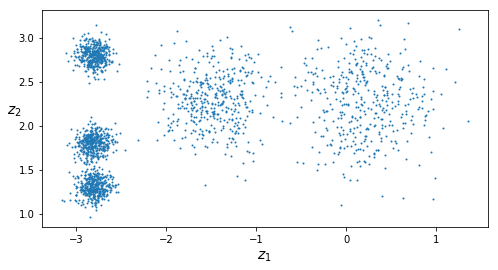

In [5]:
plt.figure(figsize = (8,4))
plot_clusters(X)
plt.show()

In [6]:
from sklearn.cluster import KMeans


In [7]:
k =5
kmeans = KMeans(n_clusters=k,random_state = 42)
y_pred = kmeans.fit_predict(X)

In [8]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [9]:
y_pred is kmeans.labels_

True

In [10]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [11]:
X_new = np.array([[0,2],[3,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 1, 2, 2])

Decision Boundaries

In [12]:
def plot_data(X):
    plt.plot(X[:,0],X[:,1],'k.',markersize =2)
    
def plot_centroids(centroids,weights = None,circle_color = 'w',cross_color = 'k'):
    if weights is not None:
        centroids = centroids[weights>weight.max()/10]
    plt.scatter(centroids[:,0],centroids[:,1],
               marker = 'o',s=30,linewidths = 8,
               color = circle_color,zorder = 10,alpha =0.9)
    plt.scatter(centroids[:,0],centroids[:,1],
               marker = 'x',s=50,linewidths = 50,
               color = cross_color,zorder = 11,alpha = 1)
    
    
def plot_decision_boundaries(clusterer,X,resolution =1000,show_centroids = True,
                            show_xlabels = True,show_ylabels = True):
    
        mins = X.min(axis =0)-0.1
        maxs = X.max(axis = 0)+0.1
        
        xx,yy = np.meshgrid(np.linspace(mins[0],maxs[0],resolution),
                           np.linspace(mins[1],maxs[1],resolution))
        Z = clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
        plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
        plot_data(X)
        if show_centroids:
            plot_centroids(clusterer.cluster_centers_)
            
        if show_xlabels:
            plt.xlabel('$x_1$',fontsize = 14)
        else:
            plt.tick_params(labelbottom ='off')
        if show_ylabels:
            plt.ylabel('$x_2$',fontsize = 14,rotation = 0)
        else:
            plt.tick_params(labelleft = 'off')
            

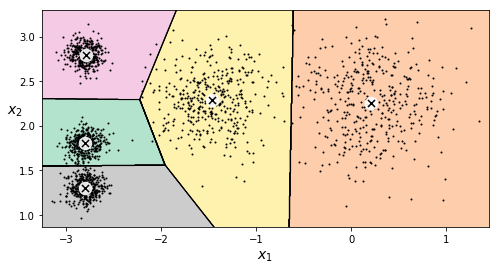

In [13]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans,X)
plt.show()

In [14]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [15]:
np.linalg.norm(np.tile(X_new,(1,k)).reshape(-1,k,2) -kmeans.cluster_centers_,axis = 2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [16]:
kmeans_iter1 = KMeans(n_clusters=5,init = 'random',n_init = 1,
                     algorithm = 'full',max_iter=1,random_state = 1)
kmeans_iter2 = KMeans(n_clusters=5,init = 'random',n_init = 1,
                     algorithm = 'full',max_iter=2,random_state = 1)
kmeans_iter3 = KMeans(n_clusters=5,init = 'random',n_init = 1,
                     algorithm = 'full',max_iter=3,random_state = 1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)


KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
    n_init=1, n_jobs=1, precompute_distances='auto', random_state=1,
    tol=0.0001, verbose=0)

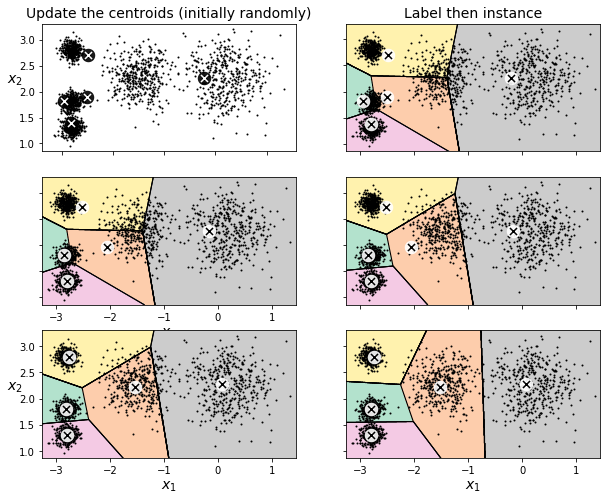

In [17]:
plt.figure(figsize=(10,8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_,circle_color='k',cross_color='w')
plt.ylabel('$x_2$',fontsize = 14,rotation =0)
plt.tick_params(labelbottom = 'off')
plt.title('Update the centroids (initially randomly)',fontsize = 14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1,X,show_xlabels=False,show_ylabels =False)
plt.title('Label then instance',fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1,X,show_centroids=False,show_ylabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2,X,show_xlabels=False,show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2,X,show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3,X,show_ylabels=False)

plt.show()


In [18]:
def plot_clusterer_comparison(clusterer1,clusterer2,X,title1 = None,title2 = None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    
    plt.figure(figsize=(10,3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1,X)
    if title1:
        plt.title(title1,fontsize =14)
        
    plt.subplot(122)
    plot_decision_boundaries(clusterer2,X,show_ylabels=False)
    if title2:
        plt.title(title2,fontsize=14)
        

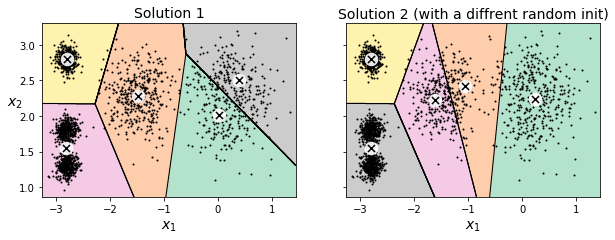

In [19]:
kmeans_rnd_init1 = KMeans(n_clusters =5,init = 'random',n_init =1,
                         algorithm = 'full',random_state  =11)
kmeans_rnd_init2 = KMeans(n_clusters =5,init = 'random',n_init =1,
                         algorithm = 'full',random_state  =19)

plot_clusterer_comparison(kmeans_rnd_init1,kmeans_rnd_init2,X,
                         'Solution 1','Solution 2 (with a diffrent random init)')
plt.show()

In [20]:
kmeans.inertia_

211.5985372581684

In [21]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)),kmeans.labels_]**2)

211.59853725816845

In [22]:
kmeans.score(X)


-211.59853725816845

In [23]:
kmeans_rnd_init1.inertia_

223.29108572819035

In [24]:
kmeans_rnd_init2.inertia_

237.46249169442848

In [25]:
kmeans_rnd_init10 = KMeans(n_clusters =5,init = 'random',n_init =10,
                         algorithm = 'full',random_state  =11)
kmeans_rnd_init10.fit(X)



KMeans(algorithm='full', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=11, tol=0.0001, verbose=0)

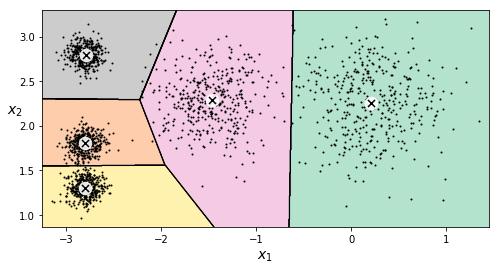

In [26]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_rnd_init10,X)
plt.show()

K-Means++

In [27]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
good_init =np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters=5,init = good_init,n_init=1,random_state =42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

In [29]:
%timeit -n 50 KMeans(algorithm='elkan').fit(X)

122 ms ± 3.82 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [30]:
%timeit -n 50 KMeans(algorithm='full').fit(X)

123 ms ± 2.78 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


Mini-Batch K-Means¶

In [31]:
from sklearn.cluster import MiniBatchKMeans

In [32]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5,random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [33]:
minibatch_kmeans.inertia_

211.93186531476786

In [34]:
filename = 'my_mnist.data'
m,n = 50000,28*28
# X_mm = np.memmap(filename,dtype ='float32',mode = 'readonly',shape = (m,n))

In [35]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X),batch_size,replace = False)]

In [36]:
np.random.seed(42)

In [37]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size =500
evaluate_on_last_n_iter = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k,init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)
    
    minibatch_kmeans.sum_intertia_ = 0
    
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration>=n_iterations -evaluate_on_last_n_iter:
            minibatch_kmeans.sum_intertia_ +=minibatch_kmeans.inertia_
    if (best_kmeans is None or
        minibatch_kmeans.sum_intertia_ < best_kmeans.sum_intertia_ ):
        best_kmeans = minibatch_kmeans

In [38]:
best_kmeans.score(X)

-211.70999744411483

In [39]:
from timeit import timeit

In [40]:
times  = np.empty((100,2))
inertias = np.empty((100,2))

for k in range(1,101):
    kmeans = KMeans(n_clusters= k,random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k,random_state=42)
    print('\r{}/{}'.format(k,100),end = '')
    times[k-1,0] = timeit('kmeans.fit(X)',number =10,globals = globals())
    times[k-1,1] = timeit('minibatch_kmeans.fit(X)',number =10,globals = globals())
    inertias[k-1,0] = kmeans.inertia_
    inertias[k-1,1] = minibatch_kmeans.inertia_
    

100/100

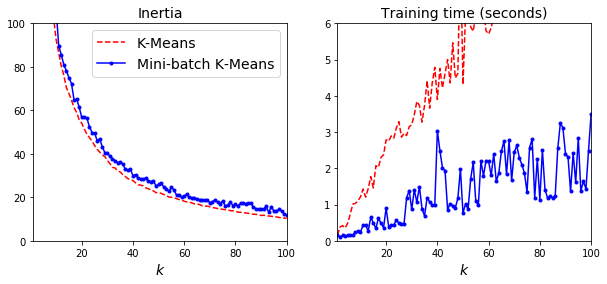

In [41]:
plt.figure(figsize = (10,4))

plt.subplot(121)
plt.plot(range(1,101),inertias[:,0],'r--',label = 'K-Means')
plt.plot(range(1,101),inertias[:,1],'b.-',label = 'Mini-batch K-Means')
plt.xlabel('$k$',fontsize =14)
plt.title('Inertia',fontsize =14)
plt.legend(fontsize = 14)
plt.axis([1,100,0,100])


plt.subplot(122)
plt.plot(range(1,101),times[:,0],'r--',label = 'K-Means')
plt.plot(range(1,101),times[:,1],'b.-',label = 'Mini-batch K-Means')
plt.xlabel('$k$',fontsize = 14)
plt.title('Training time (seconds)',fontsize = 14)
plt.axis([1,100,0,6])

plt.show()

Finding the optimal number of clusters

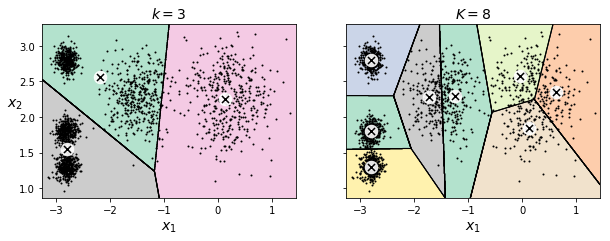

In [42]:
kmeans_k3 = KMeans(n_clusters=3,random_state=42)
kmeans_k8 = KMeans(n_clusters=8,random_state=42)

plot_clusterer_comparison(kmeans_k3,kmeans_k8,X,'$k=3$','$K=8$')
plt.show()

In [43]:
kmeans_k3.inertia_

653.2167190021553

In [44]:
kmeans_k8.inertia_

119.11983416102879

In [45]:
kmeans_per_k = [KMeans(n_clusters=k,random_state = 42).fit(X)
               for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

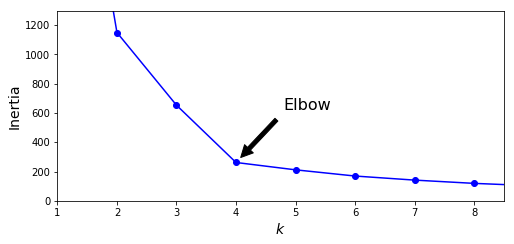

In [46]:
plt.figure(figsize =(8,3.5))
plt.plot(range(1,10),inertias,'bo-')
plt.xlabel('$k$',fontsize = 14)
plt.ylabel('Inertia',fontsize = 14)

plt.annotate('Elbow',xy =(4,inertias[3]),
            xytext = (0.55,0.55),
            textcoords = 'figure fraction',
             fontsize = 16,
             arrowprops = dict(facecolor ='black',shrink=0.1)
            )
plt.axis([1,8.5,0,1300])
plt.show()

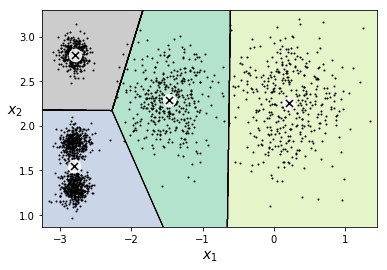

In [47]:
plot_decision_boundaries(kmeans_per_k[4-1],X)
plt.show()

In [48]:
from sklearn.metrics import silhouette_score


In [49]:
silhouette_score(X,kmeans.labels_)

0.34507909442492757

In [50]:
silhouette_scores = [silhouette_score(X,model.labels_) 
                    for model in kmeans_per_k[1:]]

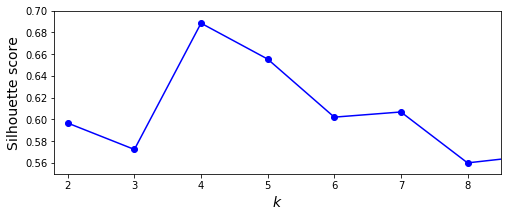

In [51]:
plt.figure(figsize = (8,3))
plt.plot(range(2,10),silhouette_scores,'bo-')
plt.xlabel('$k$',fontsize = 14)
plt.ylabel('Silhouette score',fontsize = 14)
plt.axis([1.8,8.5,0.55,0.7])
plt.show()

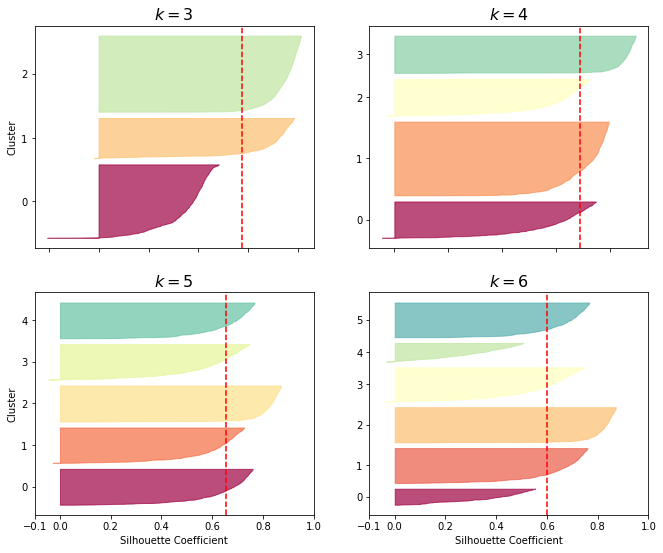

In [52]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator,FixedFormatter
import matplotlib

plt.figure(figsize = (11,9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)


    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = matplotlib.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
        
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom='off')

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_diagram")
plt.show()

Limits of K-Means

In [53]:
X1,y1 = make_blobs(n_samples=1000,centers=((4,-4),(0,0)),random_state=42)
X1 = X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2,y2 = make_blobs(n_samples=250,centers=1,random_state=42)
X2 = X2+[6,-8]
X= np.r_[X1,X2]
y= np.r_[y1,y2]

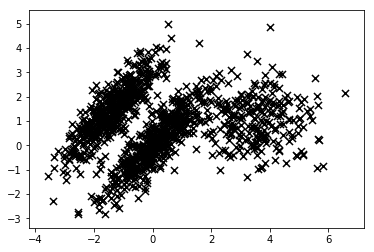

In [54]:
plot_centroids(X)
plt.show()

In [55]:
kmeans_good = KMeans(n_clusters=3
                     ,init = np.array([[-1.5,2.5],[0.5,0],[4,0]]))
kmeans_bad = KMeans(n_clusters =3,random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

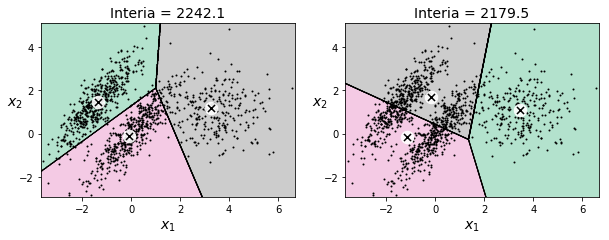

In [56]:
plt.figure(figsize =(10,3.2))
plt.subplot(121)
plot_decision_boundaries(kmeans_good,X)
plt.title('Interia = {:.1f}'.format(kmeans_good.inertia_),fontsize =14)
plt.subplot(122)
plot_decision_boundaries(kmeans_bad,X)
plt.title('Interia = {:.1f}'.format(kmeans_bad.inertia_),fontsize =14)
plt.show() 

In [57]:
from matplotlib.image import imread
import os
image = imread(os.path.join("ladybug.png"))
image.shape


(533, 800, 3)

In [58]:
X= image.reshape(-1,3)
kmeans = KMeans(n_clusters=8,random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [59]:
segmented_imgs = []
n_colors = (10,8,6,4,2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

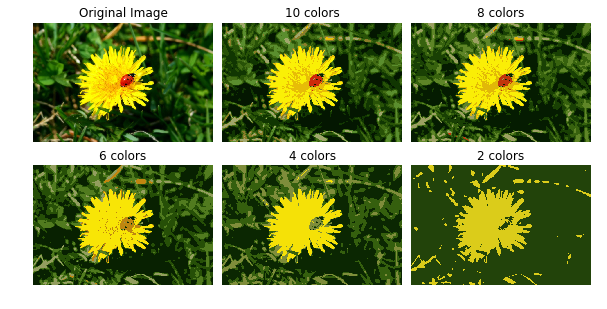

In [60]:
plt.figure(figsize = (10,5))
plt.subplots_adjust(wspace = 0.05,hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for idx ,n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_clusters))
    plt.axis('off')
    
plt.show()

Using Clustering for Preprocessing

In [61]:
from sklearn.datasets import load_digits

In [62]:
X_digits,y_digits = load_digits(return_X_y=True)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test =train_test_split(X_digits,y_digits)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
log_reg.score(X_test,y_test)

0.9488888888888889

In [68]:
from sklearn.pipeline import Pipeline

In [69]:
pipiline = Pipeline([
    ('kmeans',KMeans(n_clusters=50,random_state=42)),
    ('log_reg',LogisticRegression(random_state=42)),
])
pipiline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [70]:
pipiline.score(X_test,y_test)

0.9733333333333334

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(pipiline,param_grid,cv= 3,verbose=2)
grid_clf.fit(X_train,y_train)


Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=5 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.2s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   0.2s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   0.4s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   0.4s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.5s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.5s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.6s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.3s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.4s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   0.9s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.6s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.6s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.6s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.6s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.7s
[CV] kmeans__n_clusters=63 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=80, total=   0.7s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   0.7s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   0.7s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.8s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.7s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.8s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   0.9s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   1.0s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   0.8s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:  2.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dua...lty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kmeans__n_clusters': range(2, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [73]:
grid_clf.best_params_

{'kmeans__n_clusters': 59}

In [74]:
grid_clf.score(X_test,y_test)

0.9688888888888889

Clustering for Semi-supervised Learning

In [75]:
n_labeled =50

In [76]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])
log_reg.score(X_test,y_test)

0.8266666666666667

In [77]:
k=50

In [78]:
kmeans = KMeans(n_clusters=k,random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist,axis =0)
X_representative_digits = X_train[representative_digit_idx]

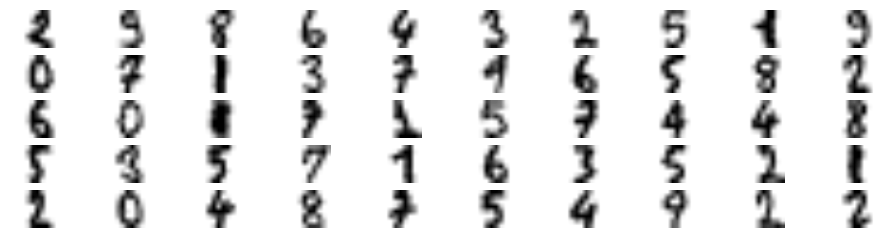

In [79]:
plt.figure(figsize =(16,4))
for index,X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k//10,10,index+1)
    plt.imshow(X_representative_digit.reshape(8,8),
              cmap = 'binary',interpolation="bilinear")
    plt.axis('off')
    
plt.show()

In [80]:
y_representative_digits = np.array([
    2, 3, 8, 6, 4, 3, 2, 5, 1, 9,
    0, 7, 1, 3, 7, 4, 6, 5, 8, 2,
    6, 0, 1, 7, 1, 5, 7, 4, 4, 8,
    2, 3, 5, 7, 1, 6, 3, 5, 2, 1,
    5, 0, 4, 8, 7, 5, 4, 9, 2, 9])

In [81]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test,y_test)

0.8111111111111111

In [82]:
y_train_propageted = np.empty(len(X_train),dtype = np.int32)
for i in range(k):
    y_train_propageted[kmeans.labels_==i] = y_representative_digits[i]

In [83]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train_propageted)
log_reg.score(X_test,y_test)

0.8466666666666667

In [84]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)),kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ ==i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist,percentile_closest)
    above_cutoff = (X_cluster_dist>cutoff_distance)
    X_cluster_dist[in_cluster&above_cutoff]=-1

In [85]:
partially_propageted = (X_cluster_dist!=-1)
X_train_partially_propagated = X_train[partially_propageted]
y_train_partially_propagated = y_train_propageted[partially_propageted]


In [86]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated)
log_reg.score(X_test,y_test)

0.8333333333333334

In [87]:
np.mean(y_train_partially_propagated==y_train[partially_propageted])

0.9201388888888888

DBSCAN

In [93]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [94]:
X,y = make_moons(n_samples=1000,noise = 0.05,random_state =42)

In [95]:
dbscan =DBSCAN(eps = 0.05,min_samples = 5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [96]:
dbscan.labels_

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

In [98]:
len(dbscan.core_sample_indices_)

808

In [99]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [100]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [101]:
dbscan2 = DBSCAN(eps = 0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [102]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

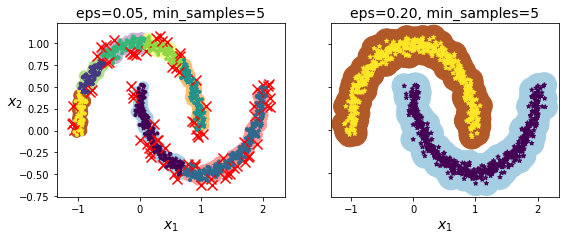

In [103]:
plt.figure(figsize = (9,3.2))
plt.subplot(121)
plot_dbscan(dbscan,X,size=100)

plt.subplot(122)
plot_dbscan(dbscan2,X,size =600,show_ylabels = False)
plt.show()

In [104]:
dbscan = dbscan2

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [108]:
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

In [109]:
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

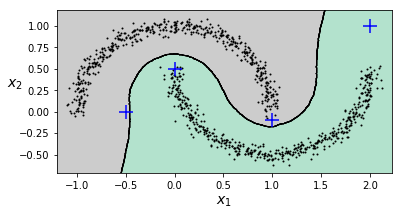

In [114]:
plt.figure(figsize =(6,3))
plot_decision_boundaries(knn,X,show_centroids=False)
plt.scatter(X_new[:,0],X_new[:,1],c='b', marker="+", s=200, zorder=10)
plt.show()

In [115]:
y_dist,y_pred_idx = knn.kneighbors(X_new,n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

Other Clustering Algorithms

In [116]:
from sklearn.cluster import SpectralClustering

In [119]:
sc1 = SpectralClustering(n_clusters=2,gamma = 100,random_state= 42)
sc1.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\csgraph\_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=100, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=42)

In [120]:
sc2 = SpectralClustering(n_clusters=2,gamma = 1,random_state= 42)
sc2.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\csgraph\_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=42)

In [121]:
np.percentile(sc1.affinity_matrix_,95)

0.04251990648936265

In [122]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

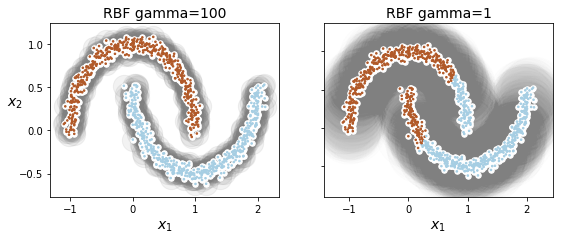

In [123]:
plt.figure(figsize = (9,3.2))
plt.subplot(121)
plot_spectral_clustering(sc1,X,size = 500,alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2,X,size  =4000,alpha=0.01,show_ylabels=False)
plt.show()

In [124]:
from sklearn.cluster import AgglomerativeClustering

In [126]:
X=np.array([0,2,5,8.5]).reshape(-1,1)
agg = AgglomerativeClustering(linkage='complete').fit(X)

In [128]:
# learned_parameters(agg)

In [129]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])